In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', None)

In [225]:
train_data = pd.read_csv('train.csv')
test_data_or = pd.read_csv('test.csv')
test_data = test_data_or

X_train = train_data.drop(['SalePrice'], axis = 1)
Y_train = train_data.SalePrice


## First we normalize the Y_train

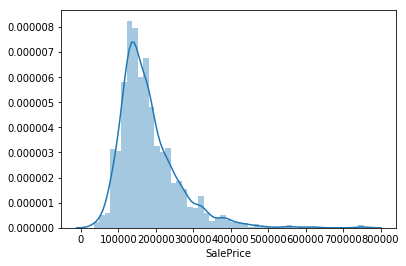

In [18]:
sb.distplot(Y_train)

As we saw, the Y_train is not normalized. So we normalize this varible.

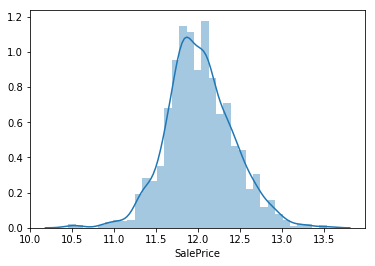

In [19]:
Y_train = np.log(Y_train)
sb.distplot(Y_train)

## Now we should analyze the features

In [111]:
X_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,NaN,NaN,0,12,2008,WD,Normal


ID is the number of each row, so it is useless feature. I will drop it

In [148]:
X_train.drop(['Id'], axis = 1, inplace = True)
test_data.drop(['Id'], axis = 1, inplace = True)

### Analyze the NaN value

In [115]:
na_ratio_train = X_train.isnull().sum() / X_train.shape[0] * 100
na_ratio_train.drop(na_ratio_train[na_ratio_train == 0].index, inplace = True)
na_ratio_train.sort_values(ascending = False, inplace = True)
NaN_train = pd.DataFrame({'NaN': na_ratio_train})
na_ratio_train

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

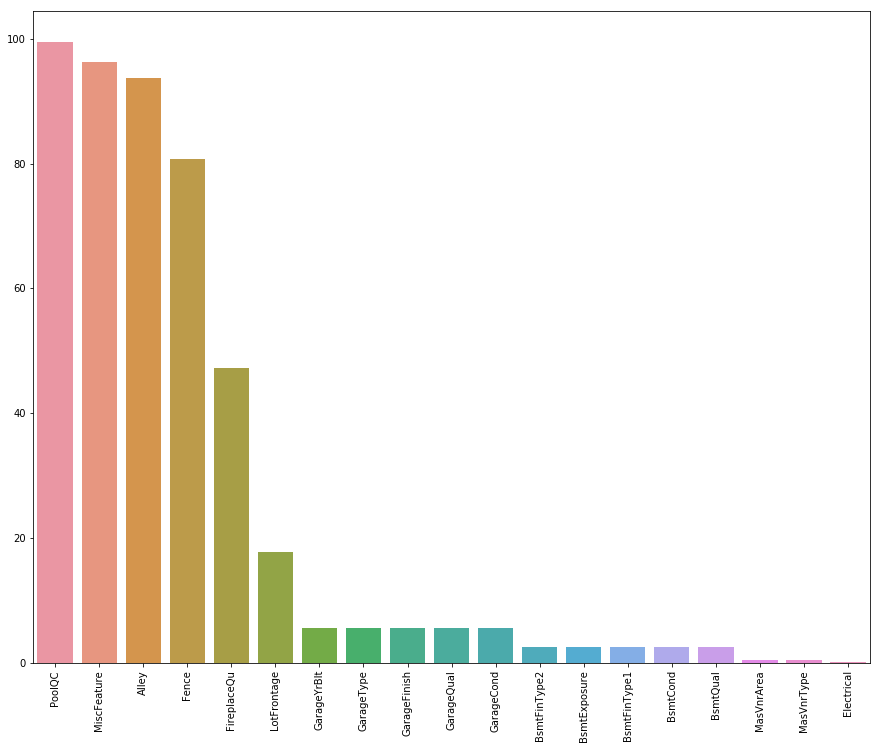

In [89]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sb.barplot(x = na_ratio_train.index, y = na_ratio_train)

As the description, NaN means no in Alley PoolQC Bsmt FireplaceQu Garage(type/finish/qual/cond) Fence MiscFeature , so we fill no in these features.

In [154]:
X_train['PoolQC'].fillna('None', inplace = True)
X_train['MiscFeature'].fillna('None', inplace = True)
X_train['Alley'].fillna('None', inplace = True)
X_train['Fence'].fillna('None', inplace = True)
X_train['FireplaceQu'].fillna('None', inplace = True)
X_train['GarageType'].fillna('None', inplace = True)
X_train['GarageFinish'].fillna('None', inplace = True)
X_train['GarageQual'].fillna('None', inplace = True)
X_train['GarageCond'].fillna('None', inplace = True)
X_train['BsmtFinType2'].fillna('None', inplace = True)
X_train['BsmtExposure'].fillna('None', inplace = True)
X_train['BsmtFinType1'].fillna('None', inplace = True)
X_train['BsmtCond'].fillna('None', inplace = True)
X_train['BsmtQual'].fillna('None', inplace = True)
X_train['GarageYrBlt'].fillna(0, inplace = True)
X_train['LotFrontage'].fillna(0, inplace = True)     

Electrical, MasVnrType and MaxVnrArea are very small, so we use the up value fill these.

In [155]:
X_train['Electrical'].fillna(method = 'ffill', inplace = True)
X_train['MasVnrType'].fillna(method = 'ffill', inplace = True)
X_train['MasVnrArea'].fillna(method = 'ffill', inplace = True)

Do the same thing to test_data

In [156]:
test_data['PoolQC'].fillna('None', inplace = True)
test_data['MiscFeature'].fillna('None', inplace = True)
test_data['Alley'].fillna('None', inplace = True)
test_data['Fence'].fillna('None', inplace = True)
test_data['FireplaceQu'].fillna('None', inplace = True)
test_data['GarageType'].fillna('None', inplace = True)
test_data['GarageFinish'].fillna('None', inplace = True)
test_data['GarageQual'].fillna('None', inplace = True)
test_data['GarageCond'].fillna('None', inplace = True)
test_data['BsmtFinType2'].fillna('None', inplace = True)
test_data['BsmtExposure'].fillna('None', inplace = True)
test_data['BsmtFinType1'].fillna('None', inplace = True)
test_data['BsmtCond'].fillna('None', inplace = True)
test_data['BsmtQual'].fillna('None', inplace = True)
test_data['LotFrontage'].fillna(0, inplace = True)
test_data['BsmtFinSF1'].fillna(0, inplace = True)
test_data['BsmtFinSF2'].fillna(0, inplace = True)
test_data['BsmtUnfSF'].fillna(0, inplace = True)
test_data['TotalBsmtSF'].fillna(0, inplace = True)
test_data['GarageYrBlt'].fillna(0, inplace = True)
test_data['GarageCars'].fillna(0, inplace = True)
test_data['GarageArea'].fillna(0, inplace = True)

In [157]:
test_data.fillna(method = 'ffill', inplace = True)

### Proprecess the datas

In [190]:
ntrain = X_train.shape[0]
ntest = test_data.shape[0]
all_data = pd.concat((X_train, test_data))

(2919, 79)

In [220]:
from sklearn.model_selection import train_test_split, GridSearchCV
all_data = pd.get_dummies(all_data)
X = all_data[:ntrain]
test = all_data[ntrain:]
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y_train, test_size = 0.2)

## Select model

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer
estimator = RandomForestRegressor()

parameters = {'n_estimators': [5, 10, 20, 30, 50], 
              'max_depth': [20, 30, 50, 70, 80],
              'min_samples_split': [5, 10, 15, 20, 30],
              'min_samples_leaf': [2, 5, 10, 20, 50]}

score = make_scorer(r2_score)

grid = GridSearchCV(estimator, parameters, scoring = score)

grid.fit(X_tr, Y_tr)

reg = grid.best_estimator_

predictions = reg.predict(X_te)




TypeError: __call__() missing 1 required positional argument: 'y_true'

In [223]:
r2_score(Y_te, predictions)

0.9069390780821632

In [224]:
result = reg.predict(test)

In [227]:
sub = pd.DataFrame()
sub['Id'] = test_data_or['Id']
sub['SalePrice'] = result

sub.to_csv('submission.csv',index = False)